In [1]:
import torch
import torch.nn as nn #layerss of neural network
from torch.optim import Adam #adam optimizer
from torch.utils.data import dataset, dataloader, DataLoader
from torchsummary import summary #to knowe the summmery of the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #because we are using binary classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from torch.utils.data import Dataset

#pytorch do not automatically detect the gpu we need to assign it so
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)



cuda


In [2]:
data_df=pd.read_csv("D:\\machineLearning\\rice\\riceClassification.csv")
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [3]:
#preprocessing and data clening
data_df.dropna(inplace=True)
data_df.drop(['id'], axis= 1, inplace=True)
data_df
print(data_df.shape)

(18185, 11)


In [4]:
print(data_df['Class'].unique()) #what are the values in the class column

[1 0]


In [5]:
print(data_df['Class'].value_counts()) #number of each item in the class column

Class
1    9985
0    8200
Name: count, dtype: int64


In [6]:
#normalization because the values in the datasets are huge and when we multiply them with various laters of NN the values will go ever higher so to reduce the computational hardness we normalize them
#we will change the max from column will be 1 and lowest will be 0
original_df=data_df.copy()
for columns in data_df.columns:
  data_df[columns]= data_df[columns]/data_df[columns].abs().max()
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [7]:
#splitting the dataset
#inputs
x=np.array(data_df.iloc[:,:-1]) #iloc takes the specific partes of the dataframe here all the rows and all the columns except of the last column

y=np.array(data_df.iloc[:,-1]) #here in the column we will take only the last column


In [8]:
#split dataset into 1. training 2. validation 3. testing
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3)

In [9]:
x_test, x_val, y_test, y_val=train_test_split(x_test ,y_test, test_size=0.5)

In [10]:
print(x_train.shape, x_test.shape, x_val.shape)

(12729, 10) (2728, 10) (2728, 10)


In [11]:

#convert our data to pytorch dataset object
class dataset(Dataset):
   def __init__(self, x, y):
    self.x= torch.tensor(x, dtype=torch.float32).to(device) #because torch only understand tensors we conver the input "x" to tensors and store that in the self.x means the x of tis particular func
    self.y= torch.tensor(y, dtype=torch.float32).to(device)

    #predifined function modifying below

   def __len__(self):
      return len(self.x) #according to our dataset

   def __getitem__(self, index):
     return self.x[index], self.y[index]



class creation done

now object creation

In [12]:
training_data=dataset(x_train, y_train)
validation_data=dataset(x_val, y_val)
testing_data=dataset(x_test, y_test)

In [13]:
#data loader
training_dataloader=DataLoader(training_data, batch_size=8, shuffle=True) #shuffle helps to avoid bias by changing order of data
validation_dataloader=DataLoader(validation_data, batch_size=8, shuffle=True) #btch size is the number of iteration one sample data is iterated if sample data size is 1000 then batch_size is 8 then it willl be 1000/8
testing_dataloader=DataLoader(testing_data, batch_size=8, shuffle=True)

build own model

In [14]:
hiddenNeurons=10 #number of hidden neurons in the next layer
class MyModel(nn.Module):
  def __init__(self): #constructor
    super(MyModel, self).__init__()

    #layer creation
    self.input_layer=nn.Linear(x.shape[1], hiddenNeurons) #linear layer is dense layer or a multi layer perceptron x.shape[1] is the number of columns of x meaning the number of inputs
    #normal multi layer perceptron or a hidden layer
    self.linear = nn.Linear(hiddenNeurons, 1) #input feature and output feature
    #activation function between 0 and 1 for binary classification
    self.sigmoid=nn.Sigmoid() #used forOutput Range Between 0 and 1


  def forward(self, x):
    #defie the layers of n
    #im the forward function we specify the dataflow

    x=self.input_layer(x)
    x=self.linear(x)
    x=self.sigmoid(x)
    return x


model=MyModel().to(device)


In [15]:
summary(model,(x.shape[1], ))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [16]:
criterion=nn.BCELoss()
optimizer=Adam(model.parameters(), lr=1e-3)

training part

In [17]:
total_loss_train_plot=[]
total_loss_validation_plot=[]
total_acc_train_plot=[]
total_acc_validation_plot=[]
epochs=5
for epoch in range(epochs):
  total_acc_train=0
  total_acc_validation=0
  total_loss_train=0
  total_loss_validation=0


  for data in training_dataloader:
    inputs, labels=data
    prediction=model(inputs).squeeze(1)

    batch_loss=criterion(prediction, labels)

    total_loss_train+=batch_loss.item()

    acc=((prediction).round()==labels).float().mean()
    total_acc_train+=acc

    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad() #when the optimizer changes the weight in this batch the optimizer resters again

  with torch.no_grad():
    for data in validation_dataloader:
      inputs, labels=data
      prediction=model(inputs).squeeze(1)


      batch_loss= criterion(prediction, labels)
      total_loss_validation+=batch_loss.item()

      total_acc_validation+=acc
  total_loss_train_plot.append(round(total_loss_train/1000, 4))
  total_loss_validation_plot.append(round(total_loss_validation/1000, 4))


  total_acc_train_plot.append(round(total_acc_train.item() / training_data.__len__() * 100, 4))
  total_acc_validation_plot.append(round(total_acc_validation.item() / validation_data.__len__() * 100, 4))

  print(f'''epoch: {epoch+1} total loss: {round(total_loss_train/1000, 4)}, train accuracy: {round(total_acc_train.item() / training_data.__len__() * 100, 4)}
        validation loss: {round(total_loss_validation/1000, 4)}, validation accuracy: {round(total_acc_validation.item() / validation_data.__len__() * 100, 4)}''')





epoch: 1 total loss: 0.6871, train accuracy: 10.8257
        validation loss: 0.0527, validation accuracy: 12.5
epoch: 2 total loss: 0.1578, train accuracy: 12.2898
        validation loss: 0.0215, validation accuracy: 12.5
epoch: 3 total loss: 0.0935, train accuracy: 12.3164
        validation loss: 0.016, validation accuracy: 12.5
epoch: 4 total loss: 0.0801, train accuracy: 12.3164
        validation loss: 0.0139, validation accuracy: 0.0
epoch: 5 total loss: 0.0748, train accuracy: 12.3232
        validation loss: 0.0131, validation accuracy: 12.5


How Loss is Computed in the Code
In your code:

python
Copy
Edit
batch_loss = criterion(prediction, labels)
criterion: This is the loss function (e.g., nn.BCELoss() for binary classification).

prediction: This is the model’s output (a probability between 0 and 1 after the sigmoid function).

labels: These are the actual ground truth values (0 or 1).

The loss function compares the predicted probability with the actual label and returns a value that tells how "wrong" the prediction was.

For example, if the model predicts 0.9 for a sample that actually belongs to class 1, the loss will be small. If the model predicts 0.1 instead, the loss will be high.



In [18]:
#testing

In [19]:
with torch.no_grad():
  total_loss_test=0
  total_acc_test=0
  for data in testing_dataloader:


    inputs, labels=data
    prediction=model(inputs).squeeze(1)

    batch_loss=criterion(prediction, labels)
    total_loss_test+=batch_loss.item()

    acc=((prediction).round()==labels).float().mean()
    total_acc_test+=acc

print(f"Accuracy:", round(total_acc_test.item() / len(testing_dataloader) * 100, 4))


Accuracy: 98.8636


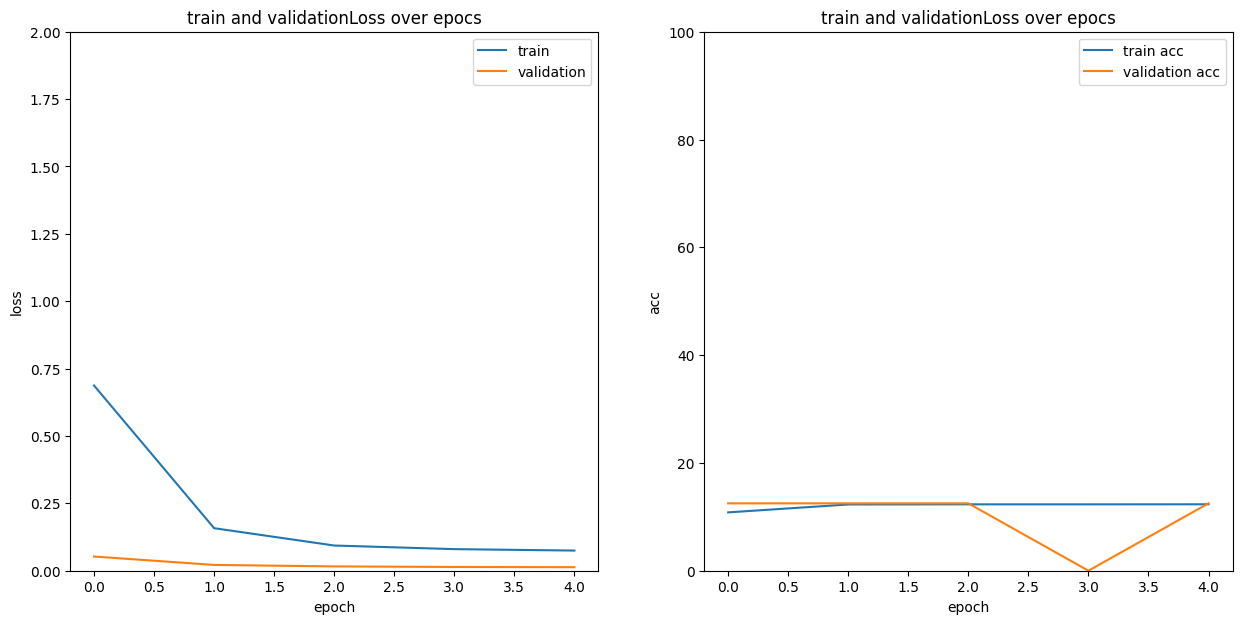

In [20]:
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
axs[0].plot(total_loss_train_plot, label="train")
axs[0].plot(total_loss_validation_plot, label="validation")
axs[0].set_title("train and validationLoss over epocs")
axs[0].set_xlabel("epoch")
axs[0].set_ylabel("loss")
axs[0].set_ylim([0,2])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label="train acc")
axs[1].plot(total_acc_validation_plot, label="validation acc")
axs[1].set_title("train and validationLoss over epocs")
axs[1].set_xlabel("epoch")
axs[1].set_ylabel("acc")
axs[1].set_ylim([0,100])
axs[1].legend()

plt.show()

In [21]:
class RiceClassifier(nn.Module):
    def __init__(self):
        super(RiceClassifier, self).__init__()
        self.layer1 = nn.Linear(in_features=10, out_features=64)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu1(self.layer1(x))
        x = self.relu2(self.layer2(x))
        x = self.sigmoid(self.output(x))
        return x


In [22]:
model = RiceClassifier().to(device)
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr=0.001)


In [23]:
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for features, labels in training_dataloader:
        labels = labels.view(-1, 1)
        outputs = model(features)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


Epoch 1/20, Loss: 0.0006
Epoch 2/20, Loss: 0.0005
Epoch 3/20, Loss: 0.0059
Epoch 4/20, Loss: 2.2363
Epoch 5/20, Loss: 0.0006
Epoch 6/20, Loss: 0.2493
Epoch 7/20, Loss: 0.0001
Epoch 8/20, Loss: 0.0002
Epoch 9/20, Loss: 0.0003
Epoch 10/20, Loss: 3.7966
Epoch 11/20, Loss: 0.0014
Epoch 12/20, Loss: 0.0016
Epoch 13/20, Loss: 0.0006
Epoch 14/20, Loss: 0.0006
Epoch 15/20, Loss: 0.0000
Epoch 16/20, Loss: 0.0049
Epoch 17/20, Loss: 0.0127
Epoch 18/20, Loss: 0.0016
Epoch 19/20, Loss: 0.0001
Epoch 20/20, Loss: 0.0001


In [24]:
scripted_model = torch.jit.script(model)
scripted_model.save("rice_classifier_scripted.pt")
